Descriptions: The Aim of this project is to visualize a stock price graph first and then make some future predictions for it

Libraries:pandas,yahoo_fin,datetime,plotly,matplotlib,prophet

In [ ]:
import pandas as pd
from yahoo_fin import stock_info
from datetime import date, timedelta 
import warnings
warnings.filterwarnings("ignore")

In [5]:
today=date.today()

d2=date.today()-timedelta(days=730)
d2=d2.strftime("%Y-%m-%d")
first_date=d2

d1=today.strftime("%Y-%m-%d")
last_date=d1


print("Start day: "+first_date)
print("End day: "+last_date)

Start day: 2023-03-02
End day: 2025-03-01


In [ ]:
symbol = 'NVDA'
data = stock_info.get_data(symbol,start_date=first_date,end_date=last_date)
data["Date"]=data.index
data.reset_index(inplace=True)
data.drop(columns=["ticker","index","adjclose"],inplace=True)

In [ ]:
import plotly.express as px

close_price=data["close"]

figure1 = px.line(data, 
                 x=data["Date"], 
                 y=close_price,  
                 title="NVIDIA Price Analysis (Line Plot)")
figure1.show()

In [ ]:
import plotly.graph_objects as go
figure2 = go.Figure(data=[go.Candlestick(x = data["Date"],
                                        open = data["open"], 
                                        high = data["high"],
                                        low = data["low"], 
                                        close = data["close"])])
figure2.update_layout(title = "NVIDIA Price Analysis (Candlestick Chart)", 
                     xaxis_rangeslider_visible = False)
figure2.show()

In [ ]:
figure3 = go.Figure(data=[go.Candlestick(x = data["Date"],
                                        open = data["open"], 
                                        high = data["high"],
                                        low = data["low"], 
                                        close = data["close"])])

figure3.update_layout(title = "NVIDIA Price Analysis (Interactive)")

figure3.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure3.show()

14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:36:52 - cmdstanpy - INFO - Chain [1] done processing


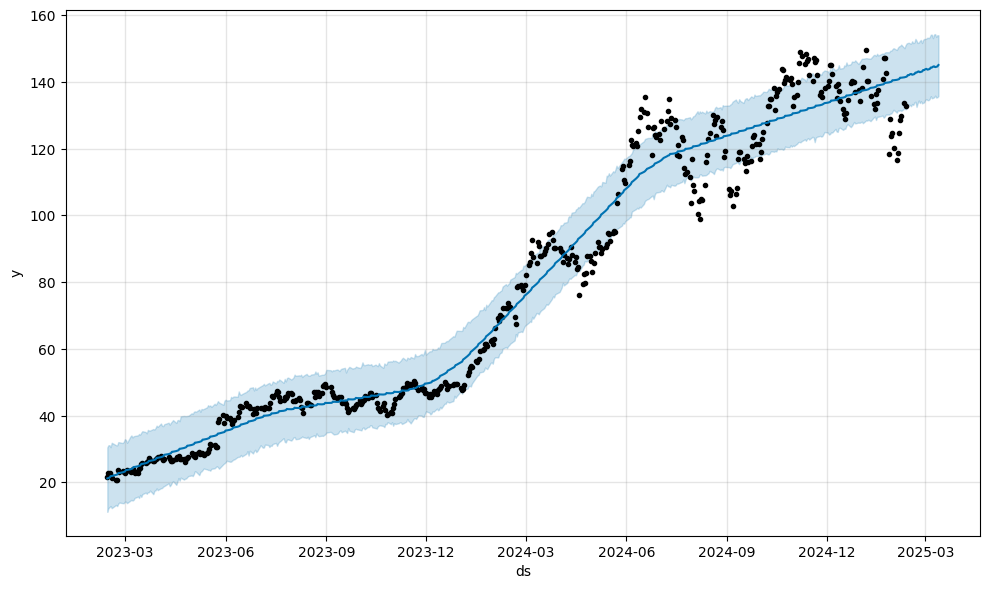

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

df = data[["Date", "close"]]
df.columns = ["ds", "y"] 

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.show()